In [9]:
#Bước tiền xử lý Dữ liệu

In [4]:
import pandas as pd
import re
from underthesea import word_tokenize

# Đọc dữ liệu từ file Excel
reviews_df = pd.read_excel("Reviews.xlsx")

# Stopword tiếng Việt và tiếng Anh
vietnamese_stopwords = set([
    'là', 'và', 'có', 'của', 'cho', 'với', 'các', 'những', 'một', 'được', 'nên', 'rất',
    'thì', 'đã', 'trong', 'khi', 'vì', 'để', 'tôi', 'anh', 'chị', 'em', 'chúng', 'bạn'
])
english_stopwords = set([
    'the', 'is', 'and', 'a', 'of', 'to', 'in', 'for', 'with', 'on', 'that', 'this', 'it', 'an', 'as'
])

# Hàm xử lý text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"[^\w\s]", " ", text)
    text = text.lower()
    words = word_tokenize(text, format="text").split()
    words = [word for word in words if word not in vietnamese_stopwords and word not in english_stopwords]
    return " ".join(words)

# Tiền xử lý 2 cột văn bản
reviews_df["What_I_liked_clean"] = reviews_df["What I liked"].apply(clean_text)
reviews_df["Suggestions_clean"] = reviews_df["Suggestions for improvement"].apply(clean_text)

# Xem kết quả
reviews_df[["What I liked", "What_I_liked_clean", "Suggestions for improvement", "Suggestions_clean"]].head()


,What I liked,What_I_liked_clean,Suggestions for improvement,Suggestions_clean
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái ít áp_lực có_thể làm_việc...,Cần đánh giá KPI khách quan và phân chia công ...,cần đánh_giá kpi khách_quan phân_chia công_việ...
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp công_ty trẻ trung_năng_động...,Nên nghiên cứu lại range lương của thì trường....,nghiên_cứu lại range lương trường site vietnam...
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội người thân_thiện giúp_đỡ lẫn nhau chương_t...,Do công ty làm outsourcing về mảng system nên ...,do công_ty làm outsourcing về mảng system thườ...
3,good env. for fresher to learn and improve the...,good env fresher to_learn and_improve their ab...,Need to forcus more on benefit and evaluate co...,need forcus more on_benefit and_evaluate contr...
4,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,- Phát triển văn phòng để rộng rãi hơn\n- Công...,phát_triển văn_phòng rộng_rãi hơn công_ty lớn ...


BƯỚC 1: Vector hóa với TfidfVectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vector hóa văn bản
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=3)  # có thể điều chỉnh thông số nếu cần
X_tfidf = tfidf_vectorizer.fit_transform(reviews_df["What_I_liked_clean"])

print("Số văn bản:", X_tfidf.shape[0])
print("Số đặc trưng (features):", X_tfidf.shape[1])


Số văn bản: 8417
Số đặc trưng (features): 4896


BƯỚC 2: Dùng KMeans để phân cụm

In [6]:
from sklearn.cluster import KMeans

# Chọn số cụm (ví dụ: 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# Gán nhãn vào DataFrame
reviews_df["What_I_liked_Topic"] = kmeans.labels_

# Xem một vài kết quả
reviews_df[["What I liked", "What_I_liked_clean", "What_I_liked_Topic"]].head(10)


,What I liked,What_I_liked_clean,What_I_liked_Topic
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái ít áp_lực có_thể làm_việc...,1
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp công_ty trẻ trung_năng_động...,1
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội người thân_thiện giúp_đỡ lẫn nhau chương_t...,1
3,good env. for fresher to learn and improve the...,good env fresher to_learn and_improve their ab...,3
4,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,4
5,- Được cấp laptop làm việc\n- Môi trường làm v...,cấp laptop làm_việc môi_trường làm_việc thân_t...,1
6,- Cấp lap mới khi đi làm\n- Có cafe pha máy th...,cấp lap mới đi làm cafe pha máy thuận_tiện chỗ...,1
7,- Laptop và các thiết bị khá xịn xò\n- Môi trư...,laptop thiết_bị khá xịn_xò môi_trường nhiều cơ...,0
8,"Sếp rất thân thiện, luôn cười và luôn có cách ...",sếp thân_thiện luôn cười luôn cách hỗ_trợ nhân...,1
9,Dynamic and young work force\nGreat working en...,dynamic and_young work force great working env...,3


BƯỚC 3: Xem đặc trưng nổi bật của từng cụm

In [7]:
import numpy as np

# Lấy từ khóa đặc trưng mỗi cụm
def get_top_keywords(model, feature_names, n_terms=10):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    keywords = []
    for i in range(model.n_clusters):
        top_words = [feature_names[ind] for ind in order_centroids[i, :n_terms]]
        keywords.append(top_words)
    return keywords

# In từ khóa đại diện cho mỗi cụm
feature_names = tfidf_vectorizer.get_feature_names_out()
top_keywords = get_top_keywords(kmeans, feature_names)

for i, topic in enumerate(top_keywords):
    print(f"Chủ đề {i}: {', '.join(topic)}")


Chủ đề 0: nhiều, học_hỏi, mới, cơ_hội, dự_án, môi_trường, làm_việc, trường, ra, tốt
Chủ đề 1: ot, không, công_ty, lương, làm_việc, nhiều, cũng, làm, mình, phải
Chủ đề 2: văn_phòng, đẹp, rộng_rãi, xe, ot, bãi, tốt, làm_việc, nhiều, nhân_viên
Chủ đề 3: good, work, working, company, overtime, environment, are, you, have, time
Chủ đề 4: môi_trường, tốt, làm_việc, thân_thiện, đồng_nghiệp, hòa, thoải_mái, đồng, nhân_viên, vui_vẻ


Bước 2 – Phân tích cảm xúc bằng từ điển (dictionary-based sentiment analysis)


In [8]:
# Danh sách từ cảm xúc đơn giản
positive_words = set([
    "tốt", "hài_lòng", "đẹp", "vui", "ổn", "thoải_mái", "thân_thiện", "chuyên_nghiệp", "tích_cực", "yêu_thích", "nhiệt_tình"
])
negative_words = set([
    "tệ", "quá_tải", "áp_lực", "chán", "bực", "khó_chịu", "mệt_mỏi", "không", "kém", "thiếu", "tồi"
])

# Hàm đánh giá cảm xúc
def get_sentiment(text):
    if not text:
        return "neutral"
    words = text.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    if pos_count > neg_count:
        return "positive"
    elif neg_count > pos_count:
        return "negative"
    else:
        return "neutral"

# Gán nhãn cảm xúc
reviews_df["Liked_sentiment"] = reviews_df["What_I_liked_clean"].apply(get_sentiment)
reviews_df["Suggestion_sentiment"] = reviews_df["Suggestions_clean"].apply(get_sentiment)

# Xem kết quả
reviews_df[["What_I_liked_clean", "Liked_sentiment", "Suggestions_clean", "Suggestion_sentiment"]].head()


,What_I_liked_clean,Liked_sentiment,Suggestions_clean,Suggestion_sentiment
0,môi_trường thoải_mái ít áp_lực có_thể làm_việc...,positive,cần đánh_giá kpi khách_quan phân_chia công_việ...,positive
1,cơ_sở_vật_chất đẹp công_ty trẻ trung_năng_động...,positive,nghiên_cứu lại range lương trường site vietnam...,neutral
2,mội người thân_thiện giúp_đỡ lẫn nhau chương_t...,positive,do công_ty làm outsourcing về mảng system thườ...,neutral
3,good env fresher to_learn and_improve their ab...,neutral,need forcus more on_benefit and_evaluate contr...,neutral
4,văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,positive,phát_triển văn_phòng rộng_rãi hơn công_ty lớn ...,neutral


Bước 3 – Trích xuất đặc trưng văn bản bằng TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tạo vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5)

# Áp dụng TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(reviews_df["What_I_liked_clean"])

# In thông tin
print("Số văn bản:", X_tfidf.shape[0])
print("Số từ đặc trưng:", X_tfidf.shape[1])


Số văn bản: 8417
Số từ đặc trưng: 3444


 Bước 4 – Phân cụm chủ đề bằng KMeans (Topic Clustering)

In [29]:
from sklearn.cluster import KMeans

# Số cụm mong muốn (có thể điều chỉnh, ví dụ từ 3-6)
num_clusters = 5

# Huấn luyện mô hình KMeans
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Gán nhãn chủ đề cho từng văn bản
reviews_df['cluster'] = kmeans_model.labels_


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Tạo lại vectorizer và ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(reviews_df["What_I_liked_clean"])

# Huấn luyện mô hình KMeans
num_clusters = 5
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Gán nhãn cụm
reviews_df['Cluster'] = kmeans_model.labels_

# Lấy tên các từ
terms = tfidf_vectorizer.get_feature_names_out()

# Hiển thị top từ đặc trưng cho từng cụm
for i in range(num_clusters):
    print(f"\nChủ đề {i}: ", end="")
    center = kmeans_model.cluster_centers_[i]
    top_indices = center.argsort()[-10:][::-1]
    print(", ".join([terms[j] for j in top_indices]))



Chủ đề 0: good, work, working, company, overtime, environment, are, you, have, time

Chủ đề 1: nhiều, học_hỏi, cơ_hội, môi_trường, mới, dự_án, tốt, làm_việc, trường, ra

Chủ đề 2: tốt, môi_trường, thân_thiện, làm_việc, đồng_nghiệp, văn_phòng, thoải_mái, hòa, đồng, đẹp

Chủ đề 3: công_ty, không, ot, làm, làm_việc, mình, cũng, nhân_viên, nhiều, người

Chủ đề 4: ot, lương, trả, không, nhiều, đầy_đủ, ít, tốt, phải, nếu


Bước 6: Trực quan hóa các cụm bằng PCA

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

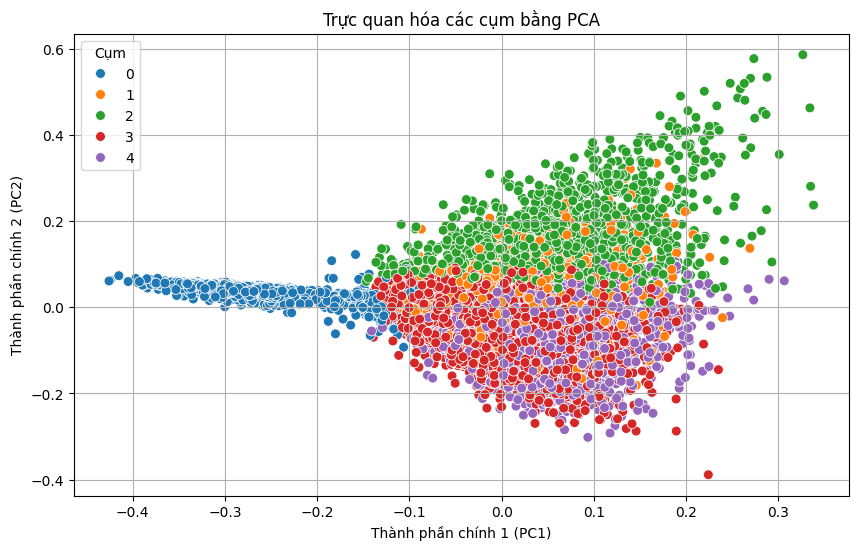

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Giảm chiều dữ liệu TF-IDF về 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Gán vào DataFrame để dễ trực quan hóa
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = reviews_df["Cluster"]

# Vẽ biểu đồ tán xạ các cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=50)
plt.title("Trực quan hóa các cụm bằng PCA")
plt.xlabel("Thành phần chính 1 (PC1)")
plt.ylabel("Thành phần chính 2 (PC2)")
plt.legend(title="Cụm")
plt.grid(True)
plt.show()


Bước 7 – Phân tích cảm xúc chi tiết theo cụm hoặc theo công ty

 Bước 7.1 – Tính điểm cảm xúc đơn giản

In [33]:
# Danh sách từ cảm xúc cơ bản
positive_words = ["tốt", "đẹp", "vui", "thân thiện", "hài lòng", "ổn", "yêu thích", "đáng"]
negative_words = ["tệ", "kém", "xấu", "khó chịu", "mệt", "chán", "bực", "tồi", "không tốt"]

# Hàm đánh giá cảm xúc đơn giản
def sentiment_score(text):
    if pd.isna(text):
        return 0
    pos = sum(word in text for word in positive_words)
    neg = sum(word in text for word in negative_words)
    return pos - neg

# Áp dụng cho 2 cột đã xử lý
reviews_df["liked_sentiment"] = reviews_df["What_I_liked_clean"].apply(sentiment_score)
reviews_df["suggestion_sentiment"] = reviews_df["Suggestions_clean"].apply(sentiment_score)

# Tổng điểm cảm xúc
reviews_df["total_sentiment"] = reviews_df["liked_sentiment"] + reviews_df["suggestion_sentiment"]


Bước 7.2 – Gắn nhãn cảm xúc: Tích cực / Trung tính / Tiêu cực

In [34]:
def label_sentiment(score):
    if score > 0:
        return "Tích cực"
    elif score < 0:
        return "Tiêu cực"
    else:
        return "Trung tính"

reviews_df["sentiment_label"] = reviews_df["total_sentiment"].apply(label_sentiment)


 Bước 7.3 – Phân tích cảm xúc theo cụm KMeans

In [35]:
# Phân phối cảm xúc theo cụm
cluster_sentiment_summary = reviews_df.groupby("cluster")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)

# Hiển thị bảng tóm tắt
print(cluster_sentiment_summary)


sentiment_label  Tiêu cực  Trung tính  Tích cực
cluster                                        
0                0.002896    0.944981  0.052124
1                0.027653    0.404335  0.568012
2                0.018783    0.211119  0.770098
3                0.029831    0.384746  0.585424
4                0.023837    0.334847  0.641317
